
# NOLAN ROTH
# COMPUTATION PROJECT

# TOPIC: THE VOSTOK ICE CORE AND MILANKOVICH CYCLES

In 1999, scientists completed a project that drilled over 3000 meters below the Antarctic surface and recovered C0$_2$ concentration data from the ice. This data allowed for the long-standing theory of Milankovich cycles, developed by Croatian scientist Milutin Milankovich, to be tested.

But first...what are Milankovich cycles?
Natural global warming, and cooling, is considered to be initiated by Milankovitch cycles. The orbital and axial variations narually occuring in Earth's cycles around the sun influence the initiation of climate change in long-term natural cycles of 'ice ages' and 'warm periods' known as 'glacial' and 'interglacial' periods.
    -The OSS Foundation,http://ossfoundation.us/projects/environment/global-warming/milankovitch-cycles

The three largest parts of the Milankovich cycle are the Earth's constantly changing:

-Obliquity, or axial tilt

-Orbital Eccentricity

-Axial Precession, or wobble
    
I want to examine each of these physical astrodynamic characteristics and correlate them to the seemingly periodic nature of the Vostok ice core data set. It has been stated by researchers that the Vostok data supports the Milankovich theory, so this is not truly original analysis, but I find it interesting none-the-less.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

df = pd.read_csv("vostokdata.txt", sep="\t")
df.head()

,Depth,Age-of-Ice,Age-of-Air,co2-con
0,149.1,5679,2342,284.7
1,173.1,6828,3634,272.8
2,177.4,7043,3833,268.1
3,228.6,9523,6220,262.2
4,250.3,10579,7327,254.6


# THE VOSTOK ICE CORE DATA
This is the raw data taken from the Vostok ice core. The plot below shows the C0$_2$ concentration in the ice against the age of the ice extracted--the farther below the surface of Antarctica, the older the ice. The data shows a seemingly semi-periodic signal in the C0$_2$ concentrations! Environmental scientists have been able to connect atmospheric C0$_2$ concentrations to global heating and cooling, with larger concentrations of C0$_2$ in the atmosphere linked to warmer, inter-glacial periods in Earth's history.

Text(0.5,1,'C0$_2$ Concentration vs. Time')

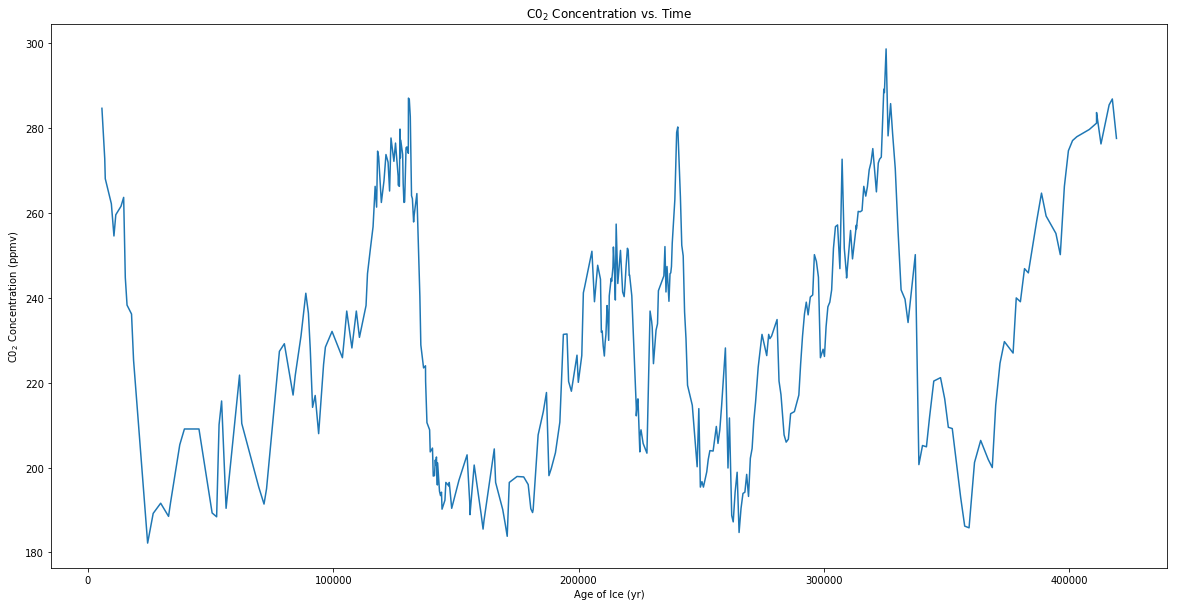

In [3]:
plt.figure(figsize=[20,10])

plt.plot(df["Age-of-Ice"],df["co2-con"])
plt.xlabel('Age of Ice (yr)')
plt.ylabel('C0$_2$ Concentration (ppmv)')
plt.title("C0$_2$ Concentration vs. Time")

# Obliquity

Obliquity, or axial tilt, is the inclination of the Earth's axis in relation to its plane of orbit around the Sun. Oscillations in the degree of Earth's axial tilt occur on a periodicity of 41,000 years from 21.5 to 24.5 degrees.
    -Indiana University, http://www.indiana.edu/~geol105/images/gaia_chapter_4/milankovitch.htm

Periodicity:
21.5 -> 24.5 -> 21.5 over 41000 years; 1 degree / 6833.33 years

Calibration: Right now, Earth's obliquity is approximitely 23.4 degrees and decreasing, so we need to shift our wave by the difference from least-oblique (21.5 degrees, mapped to -1.00 on the y-axis), which is 1.9 degrees. In the sine function, this 1.9 degrees needs to be mapped into radians, coming to 0,269 radians.

In reading the plot below, I plotted the obliquity in degrees against time, running the graph over 400000 years--much like the length of the ice-core data.

Text(0.5,1,"Earth's Obliquity vs Time")

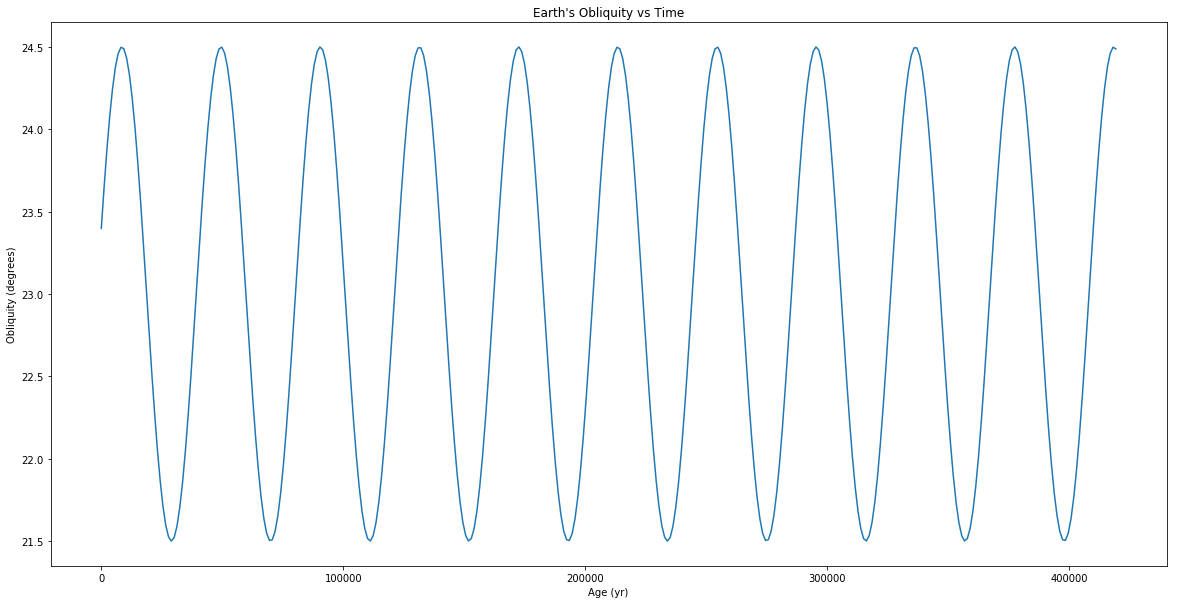

In [4]:
a1 = 1.5
##omega = (3)/20500
omega1 = (2*np.pi)*(2.439e-5)
t = np.linspace(0,df['Age-of-Ice'].max(),363)
obliquity = lambda t: a1*np.sin(omega1*t+0.269)+23

plt.figure(figsize=[20,10])
plt.plot(t,obliquity(t))
plt.xlabel('Age (yr)')
plt.ylabel('Obliquity (degrees)')
plt.title('Earth\'s Obliquity vs Time')

#plt.figure(figsize=[20,10])
#plt.plot(t, df['co2-con']-obliquity(t))

# Eccentricity

The shape of the Earth's orbit varies between nearly circular (with the lowest eccentricity of 0.000055) and mildly elliptical (highest eccentricity of 0.0679). Its geometric or logarithmic mean is 0.0019. The major component of these variations occurs with a period of 413,000 years (eccentricity variation of ±0.012). Other components have 95,000-year and 125,000-year cycles (with a beat period of 400,000 years). They loosely combine into a 100,000-year cycle (variation of −0.03 to +0.02).
    -Laskar, J; Fienga, A.; Gastineau, M.; Manche, H (2011). "La2010: A New Orbital Solution for the Long-term Motion of the Earth". Astronomy & Astrophysics

Periodicity: 0.0055% eccentric to 6.79% eccentric cyclic over 100000 years. One extreme to the next in 50000 years; periodicity of 6.7845/50000

Calibration: Right now, the Earth's eccentricity is approximitely 0.0167, or 1.67%. Thus, we need to shift the sine wave to start its 0th year point at 1.67. Mapped to radians, this ends up being a -0.5321 radian shift.

Text(0.5,1,"Earth's Eccentricity vs Time")

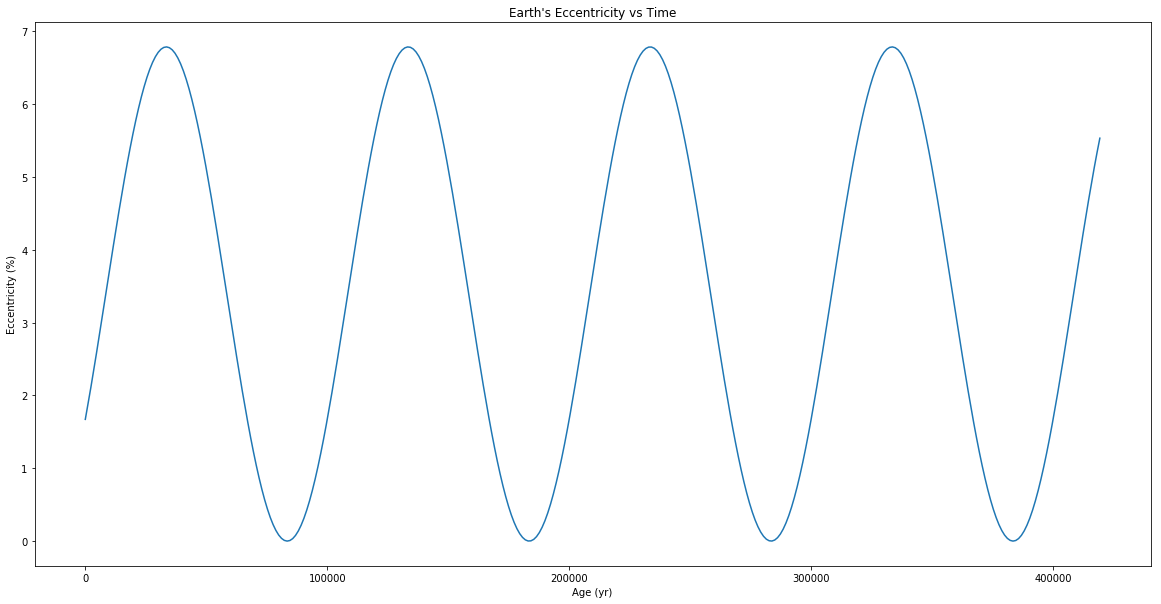

In [5]:
a2 = 3.3922
#omega = (6.7845)/(50000)
omega2 = (2*np.pi)*(1e-5)
t = np.linspace(0,df['Age-of-Ice'].max(),363)
eccentricity = lambda t: a2*np.sin(omega2*t-.5321)+3.392

plt.figure(figsize=[20,10])
plt.plot(t,eccentricity(t))
plt.xlabel('Age (yr)')
plt.ylabel('Eccentricity (%)')
plt.title('Earth\'s Eccentricity vs Time')

# Axial Precession

Axial precession is the trend in the direction of the Earth's axis of rotation relative to the sun, with a period of 25,771.5 years.

Periodicity: One precession every 25771.5 years; half-precession in 12885.25 years. Thus, the Earth's axial precession brings it from one extreme to the other in 12885.25 years.

Calibration: Right now, Earth is approximitely half way through its precession to maximum irradiation, so the shift only needs to represent that the precession is moving towards the opposite-than-default extreme. The precession is moving in a way that in approximitely 13,000 years, the Earth will be at its "hottest" extreme, with the north pole pointing directly at the sun.

Mapping: This sine wave is mapped between -1.00 and 1.00, where -1.00 represents the year at which Earth is at its "coldest" extreme, or the north pole is pointed directly away from the sun, and 1.00 represents the year at which Earth was at its "hottest" extreme, or the pole is pointed direclty at the sun.

Text(0.5,1,"Earth's Axial Precession vs Time")

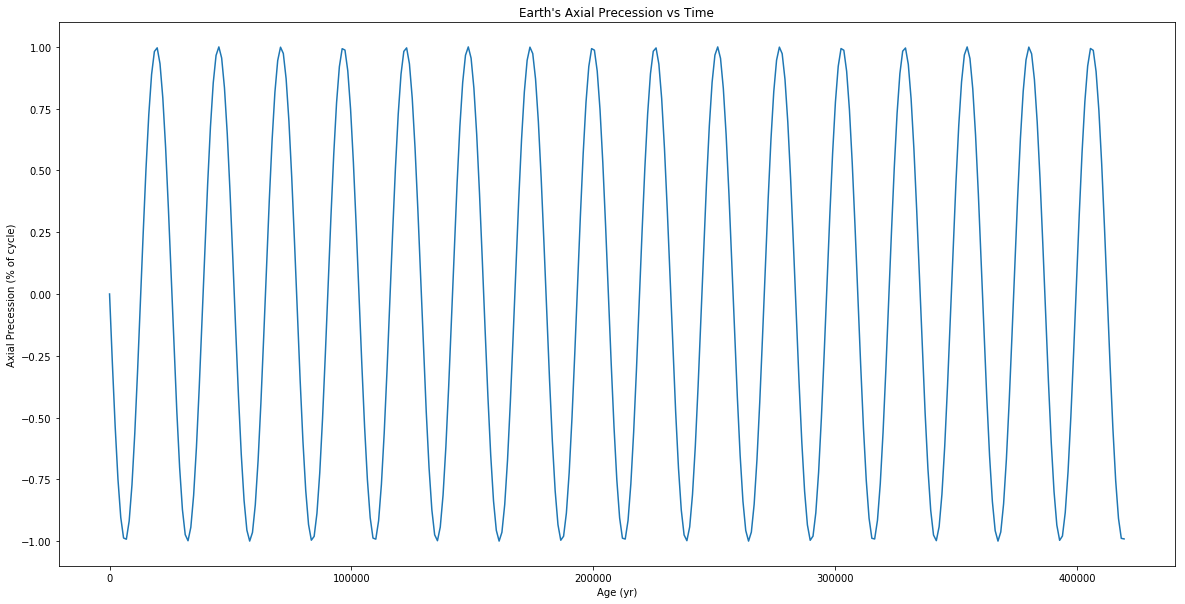

In [5]:
a3 = 1
omega3 = (2*np.pi)*(3.8803e-5)
t = np.linspace(0,df['Age-of-Ice'].max(),363)
axialprecesion = lambda t: a3*np.sin(omega3*t-np.pi)

plt.figure(figsize=[20,10])
plt.plot(t,axialprecesion(t))
plt.xlabel('Age (yr)')
plt.ylabel('Axial Precession (% of cycle)')
plt.title('Earth\'s Axial Precession vs Time')

# CORRELATION

Now that the parts of the Milankovich cycle have been outlined, their sine waves can be overlayed with the Vostok ice core data to visualize correlation. The goal of this is to see, using this rudimentary method, which of the three main parts may have the greatest effect on long-term global temperature patterns.

To do this, I took each of the previously defined patterns--obliquity, eccentricity, and axial precession--and parsed their values for each time-point in the original Vostok ice core data set. This, in a sense, calibrates the ideal model data and normalizes them to the scale of the empirical ice core data.

First up is:

# Obliquity's Correlation

Below is the chart of Earth's obliquity overlayed with the Vostok ice core data set. You can see that, while some peaks are common between both data sets, the obliquity model has a significant number of unaccounted for spikes and offsets. While this may in part be due to imperfect modeling of the obliquity system, it may also allude to the idea that Earth's obliquity does not fully represent the long-term global atmospheric changes experienced.

Text(0.5,1,'Obliquity Correlation with Vostok Data')

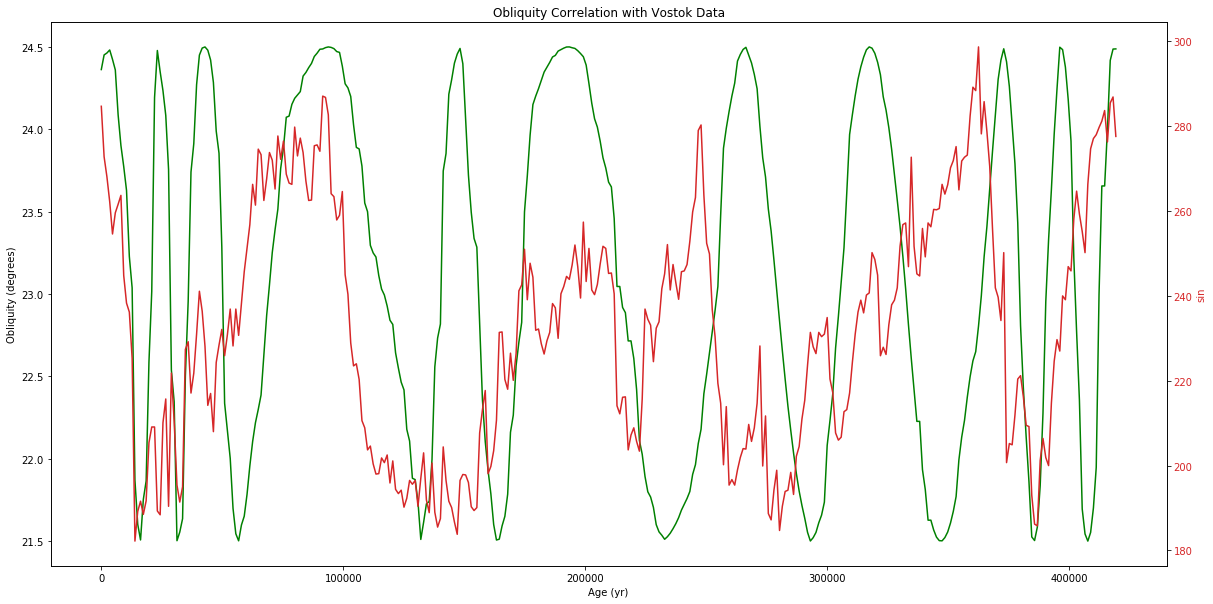

In [6]:
fig, ax1 = plt.subplots(figsize=[20,10])

ax1.set_xlabel('Age (yr)')
ax1.set_ylabel('Obliquity (degrees)')
ax1.plot(t, obliquity(df['Age-of-Ice']),color='Green')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('sin', color=color)
ax2.plot(t, df['co2-con'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_title('Obliquity Correlation with Vostok Data')

Next up,

# Eccentricity's Correlation

Earth's eccentricity falls over a much larger period than its changes in obliquity, and you can see that the sweeping "hills" in the model data fall closely over the larger peaks in the Vostok ice core set! This might suggest that, of the three sections of the Milankovich cycle, eccentricity plays a very large--if not the largest--part.

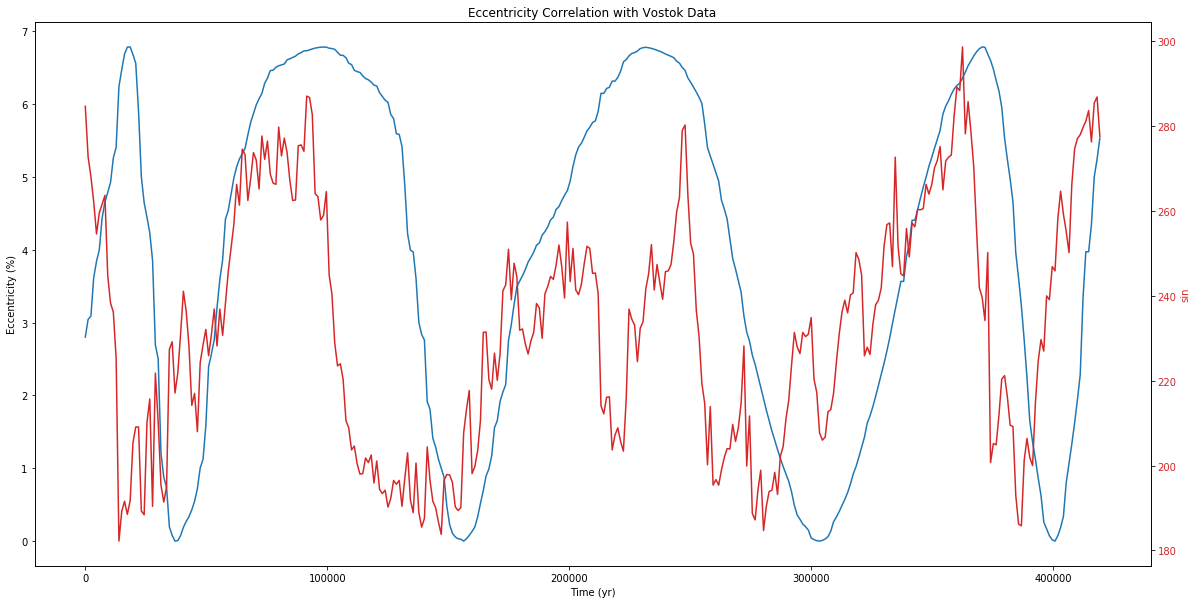

In [14]:
fig, ax1 = plt.subplots(figsize=[20,10])

ax1.set_xlabel('Time (yr)')
ax1.set_ylabel('Eccentricity (%)')
ax1.plot(t, eccentricity(df['Age-of-Ice']))
ax1.tick_params(axis='y')
ax1.set_title('Eccentricity Correlation with Vostok Data')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('sin', color=color)
ax2.plot(t, df['co2-con'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Axial Precession's Correlation

This one is slightly less obvious. Earth's axial precession oscillates much more frequently than either its obliquity or its eccentricity around the Sun, and overlaying this data to the Vostok ice core lets us see that, while it may not correlate closely to the large, broad peaks in the data, the axial precession may contribute significantly to the smaller "noisy" peaks.

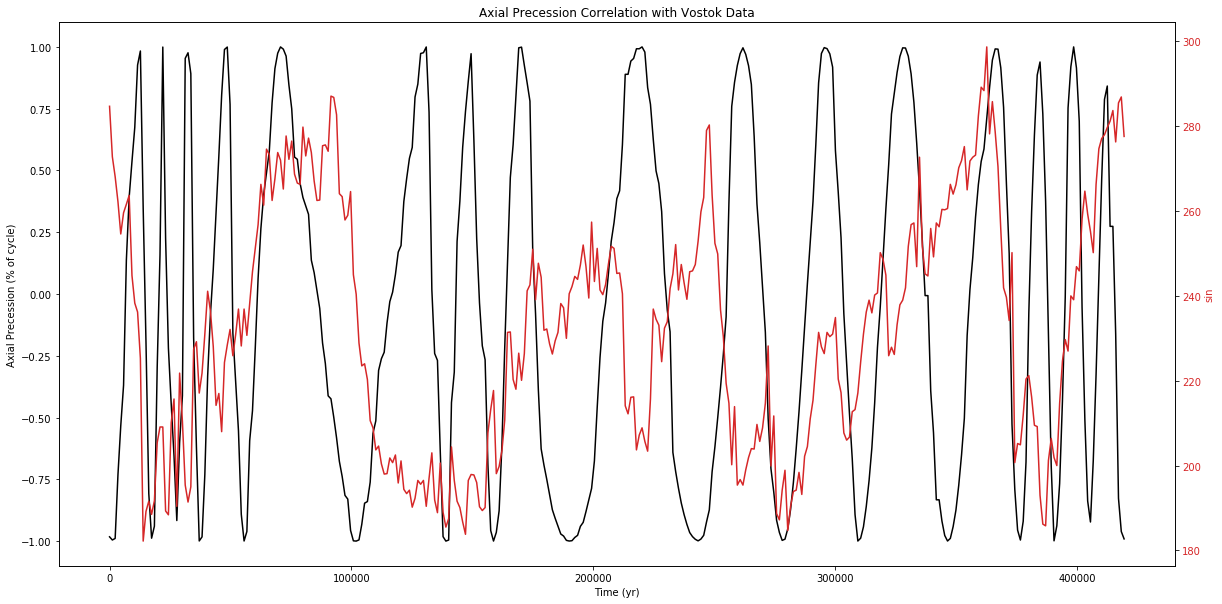

In [15]:
fig, ax1 = plt.subplots(figsize=[20,10])

ax1.set_xlabel('Time (yr)')
ax1.set_ylabel('Axial Precession (% of cycle)')
ax1.plot(t, axialprecesion(df['Age-of-Ice']),color='Black')
ax1.tick_params(axis='y')
ax1.set_title('Axial Precession Correlation with Vostok Data')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('sin', color=color)
ax2.plot(t, df['co2-con'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# CONCLUSION

With each of the three parts of the Milankovich cycle, it can be seen that each has played its own part in influencing the Earth's climate over the last hundreds of thousands of years. The broad peaks may be attributed to the Earth's fluctuating eccentricity, the next division of peaks within those broad spikes may be caused in part by the ever-changing obliquity of the planet, and the small "noisy" peaks may be closely related to the rapid axial precession of the Earth. While these three parts surely correlate in some fashion to the Vostok ice core data, there is doubtless many more factors that came into play with the creation of the Vostok ice core data.


# Note

Below are some blocks of code that i was experimenting with. They are commented out as I didn't want to use them in the final version, but they can be interesting none-the-less. They focus on the creation of a summation of the three Milankovich waveforms and a difference plot between that summation and the Vostok ice core data. Finally, there is a rough fit to the difference plot. Again, these are not used in my final discussion because I realized that the three Milankovich waveforms, as I have created them, cannot simply be summed to give an applicable waveform.

There's a lot more I can do in dealing with Milankovich cycles, and I'm very interested in their application to fictional (or at least non-Earth) settings.

In [18]:
#'''
def f(t):
    wavesum=obliquity(t)+axialprecesion(t)+eccentricity(t)
    return wavesum

print(f(t).max(),f(t).min())
print(df['co2-con'].max(),df['co2-con'].min())
#'''

31.589631579362944 21.100488736254135
298.7 182.2


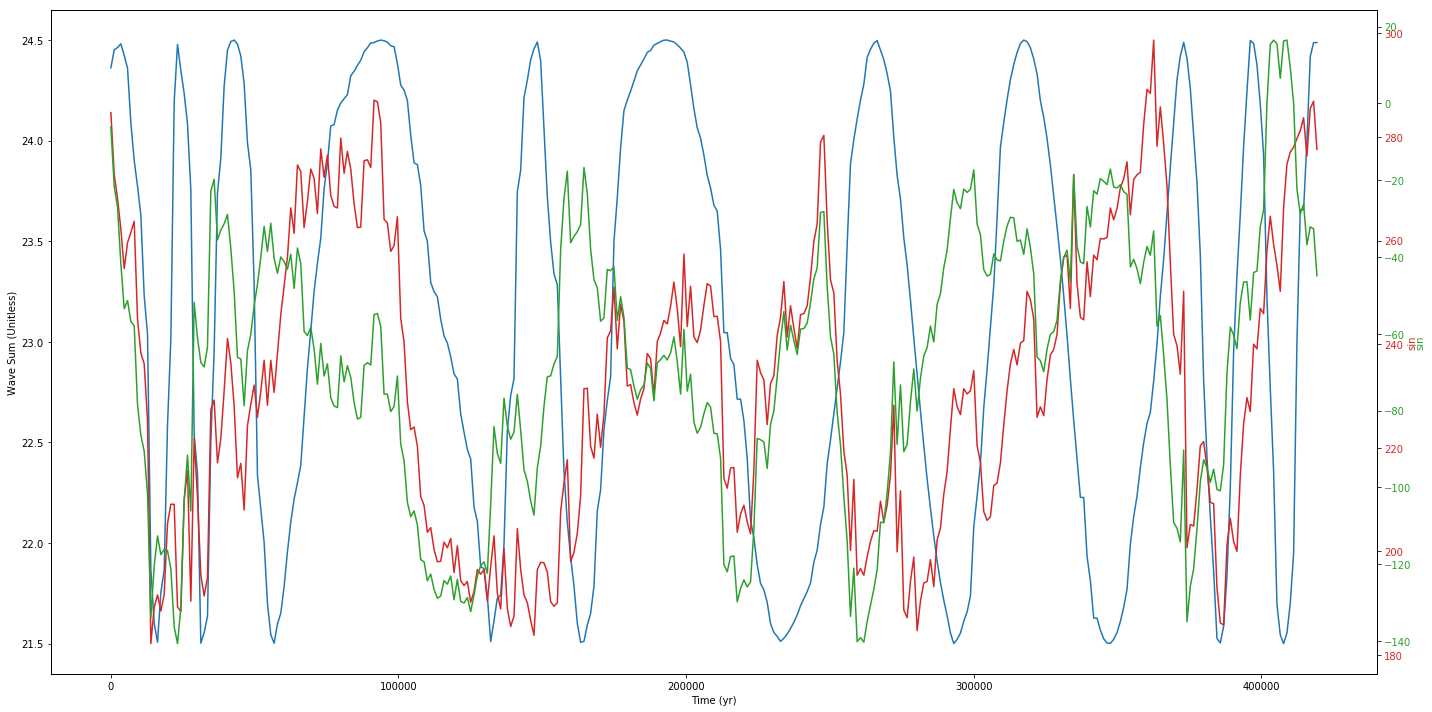

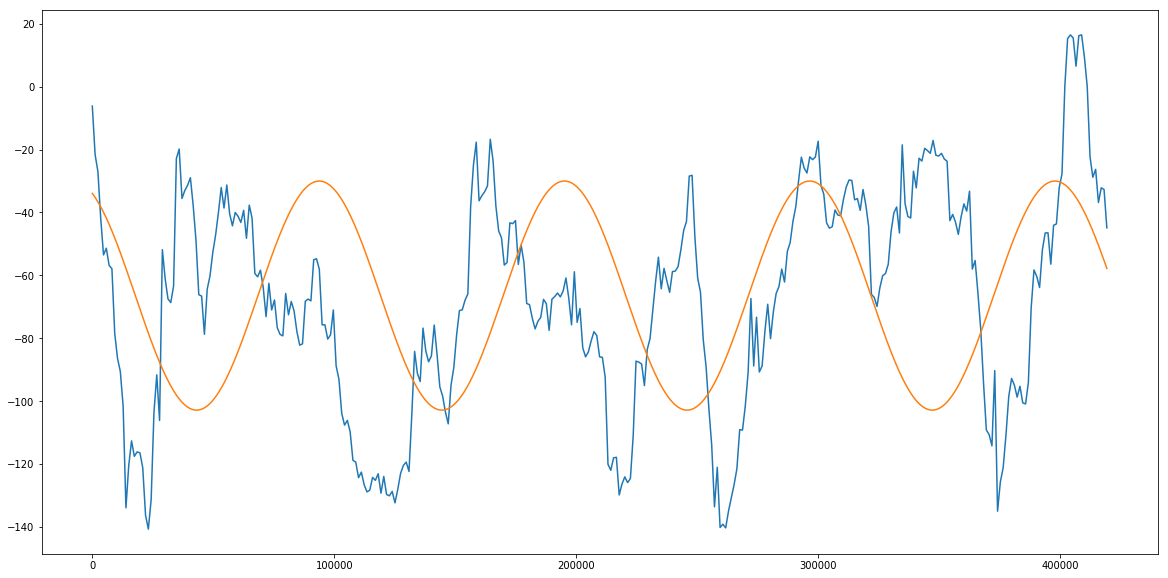

In [19]:
#'''
scale = 11.11
fig, ax1 = plt.subplots(figsize=[20,10])

ax1.set_xlabel('Time (yr)')
ax1.set_ylabel('Wave Sum (Unitless)')
ax1.plot(t, obliquity(df['Age-of-Ice']))
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('sin', color=color)
ax2.plot(t, df['co2-con'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()

color = 'tab:green'
ax3.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax3.plot(t, df['co2-con']-scale*f(df['Age-of-Ice']), color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

plt.figure(figsize=[20,10])
plt.plot(t, df['co2-con']-scale*f(df['Age-of-Ice']))

def sinefit(x,a,b,c,d):
    return a*np.sin(b*x+c)+d

params, params_covariance = curve_fit(sinefit, df['Age-of-Ice'], df['co2-con']-scale*f(df['Age-of-Ice']),p0=[70,np.pi/50000,np.pi,-70])
t2 = np.linspace(0,df['Age-of-Ice'].max(),10000)
plt.plot(t2,sinefit(t2,*params))
#'''